# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.45968897, 0.41108937, 0.38051737])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \cfrac{1}{1+e^{-X_i\theta}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.e**z)
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.2761197871744865

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma\{y_i\log p (X_i) + (1-y_i)\log(1-p(X_i))\}$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y*np.log1p(p) + (1-y)*np.log1p(1-p))
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = np.sum(y-y_hat)**2 / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y, parameters)
    loss = loss/X_set.shape[0]
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

-0.45132593234487783

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^TX_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma(y_i-p_i)X_{ij}$

In [17]:
np.array([1,2,3]).dot([1,2,3])

14

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09872759944536212

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[18.10060013758355, -40.73483587047071, -8.028593083796471]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: data를 batch_size 만큼씩 나눠 각 mini batch마다 해당되는 data의 index를 리스트에 담아 반환하는 함수이다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.45848227, 0.41380502, 0.38105261])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 모두 한 번씩 학습에 사용한 경우, 1 epoch 학습했다고 한다.
- num_epoch: 학습한 epoch 수
<br>

BGD: 한번 학습을 진행(경사하강법을 수행)할 때 전체 데이터셋을 사용하여 학습하는 것을 의미<br>
SGD: 한번 학습을 진행(경사하강법을 수행)할 때 1개의 데이터만을 사용하여 학습하는 것을 의미<br>
MGD: 한번 학습을 진행(경사하강법을 수행)할 때 mini batch(batch_size만큼의 데이터)를 사용하여 학습하는 것을 의미<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  <br>
batch_size=1 -> SGD<br>
batch_size=k -> $k!=1$ and $k!=$whole일 때, MGD<br>
batch_size=whole -> BGD<br>

In [25]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd = gradient_descent(X_train, y_train, X_train.shape[0])
new_param_bgd

epoch: 0  loss: -0.25993019270997947  params: [-165.76429658  319.00459712  170.07885024]  gradients: [56.25, -91.64684974828552, -43.90571132847078]


array([-165.76429658,  319.00459712,  170.07885024])

In [27]:
new_param_sgd = gradient_descent(X_train, y_train, 1)
new_param_sgd

epoch: 0  loss: -0.5260170833487909  params: [-2.581043    5.48752302  2.50003154]  gradients: [0.010338736440422373, -0.02642432132448043, 0.03370712994738763]
epoch: 100  loss: -0.5776226504619485  params: [-381.21302431  465.80913789  215.07337086]  gradients: [0.0625000000032187, 0.0006086926909482383, 0.031606615356093354]


/var/folders/ty/d0l26xd500q6hk3ryfccwjy00000gn/T/ipykernel_5036/1148764998.py:3: RuntimeWarning: overflow encountered in double_scalars
  p = 1/(1+np.e**z)


epoch: 200  loss: -0.577622621905168  params: [-778.60739862  915.19327761  419.90979266]  gradients: [0.06250001967416742, 0.000608703395897349, 0.031606629196390755]
epoch: 300  loss: -0.5672949871713029  params: [-1178.66550548  1362.66361321   624.0751284 ]  gradients: [0.06939037933788061, 0.0043584437152992, 0.03645462246337971]
epoch: 400  loss: -0.4620981205674542  params: [-1584.11997122  1807.19724513   824.44363599]  gradients: [0.12499999991133556, 0.03462125242020084, 0.07558103665329387]
epoch: 500  loss: -0.46209812037329684  params: [-1990.36997122  2251.29794655  1024.25241306]  gradients: [0.125, 0.03462125246845211, 0.07558103671567734]
epoch: 600  loss: -0.46209812037329684  params: [-2396.61997122  2695.39864797  1224.06119012]  gradients: [0.125, 0.03462125246845211, 0.07558103671567734]
epoch: 700  loss: -0.46209812037329684  params: [-2802.86997122  3139.49934939  1423.86996718]  gradients: [0.125, 0.03462125246845211, 0.07558103671567734]
epoch: 800  loss: -0.4

array([-4017.57922781,  4467.35558353,  2021.26568168])

In [28]:
new_param_mgd = gradient_descent(X_train, y_train, 16)
new_param_mgd

epoch: 0  loss: -0.46209855682810713  params: [-35.38436332  74.25540996  31.30525903]  gradients: [4.372002760589138e-06, -0.6769820313016959, 0.5936542985853872]


array([-60.41997319, 112.02458313,  53.27018124])

### Predict Label

In [29]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

/var/folders/ty/d0l26xd500q6hk3ryfccwjy00000gn/T/ipykernel_5036/1148764998.py:3: RuntimeWarning: overflow encountered in double_scalars
  p = 1/(1+np.e**z)


### Confusion Matrix

In [30]:
from sklearn.metrics import *

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[22, 18],
       [ 6,  4]])

In [32]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.52


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [33]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [34]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [35]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.55532768, 2.46072891])

In [36]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'linear', batch_size = 16)
new_param

epoch: 0  loss: 0.6290468002688817  params: [0.93904702 0.89592661]  gradients: [-0.018601102250113407, -0.008887791942205117]
epoch: 100  loss: 0.5892755605403338  params: [0.5867096  2.46161984]  gradients: [-0.0034903307587707422, 0.0017619817383929303]
epoch: 200  loss: 0.5895135214612762  params: [0.58540574 2.46411057]  gradients: [-0.003495505656458467, 0.0017651752736283681]
epoch: 300  loss: 0.5895139564713027  params: [0.58540336 2.46411512]  gradients: [-0.0034955151087699646, 0.0017651811068431725]
epoch: 400  loss: 0.5895139572658804  params: [0.58540336 2.46411513]  gradients: [-0.00349551512603528, 0.0017651811174979497]
epoch: 500  loss: 0.5895139572673315  params: [0.58540336 2.46411513]  gradients: [-0.003495515126066809, 0.0017651811175174042]
epoch: 600  loss: 0.589513957267334  params: [0.58540336 2.46411513]  gradients: [-0.003495515126066863, 0.0017651811175174424]
epoch: 700  loss: 0.589513957267334  params: [0.58540336 2.46411513]  gradients: [-0.00349551512606

array([0.58540336, 2.46411513])

In [37]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

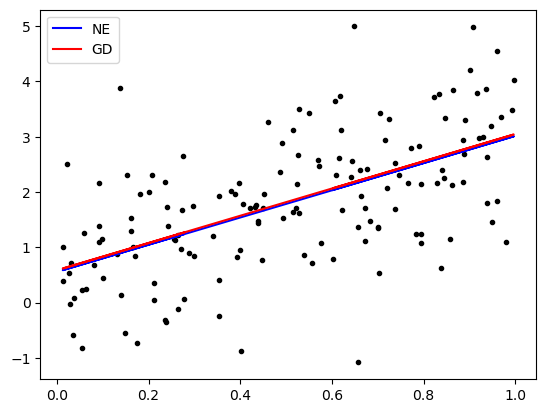

In [38]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()